In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("not_final3.csv")
df = df.rename(columns={'Sport_-1': 'Sport'})

# List of sports to exclude
excluded_sports = ['climbing', 'Fitness', 'Headis']

# Filter out excluded sports
df = df[~df['Sport'].isin(excluded_sports)]

# Define parameters including 'label'
parameters = ['drug', 'equity', 'popularity', 'normalizedcountry', 'CV', 'label']

# Initialize a dictionary to store processed data for each sport
sport_data_dict = {}

for sport_name in df['Sport'].unique():
    sport_dict = {'Year': []}
    
    # Initialize a DataFrame for Year
    all_years = pd.Series(dtype=int)
    
    for parameter in parameters:
        param_columns = [col for col in df.columns if col.startswith(f"{parameter}_")]
        
        if not param_columns:
            continue
        
        # Melt the data for this parameter
        melted_data = df[df['Sport'] == sport_name][['Sport'] + param_columns].melt(
            id_vars='Sport', var_name='Year', value_name=f'{parameter}_Value'
        )
        melted_data['Year'] = melted_data['Year'].str.extract(r'(\d+)').astype(int)  # Extract year as int
        melted_data = melted_data.sort_values('Year')

        if all_years.empty:
            all_years = melted_data['Year']
        else:
            all_years = pd.concat([all_years, melted_data['Year']]).drop_duplicates().sort_values()
        
        # Align parameter data with all years
        melted_data = melted_data.set_index('Year').reindex(all_years).reset_index()
        
        # Handle missing data based on parameter type
        if parameter == 'drug':
            melted_data[f'{parameter}_Value'] = melted_data[f'{parameter}_Value'].fillna(0)  # For drug, fill missing with 0
        elif parameter in ['popularity', 'CV']:
            # For popularity and CV, treat 0 as missing and replace with NaN
            melted_data[f'{parameter}_Value'] = melted_data[f'{parameter}_Value'].replace(0, np.nan)
        else:
            # Preserve NaN for other parameters
            melted_data[f'{parameter}_Value'] = melted_data[f'{parameter}_Value']
        
        # Store parameter values aligned by Year
        sport_dict[parameter] = melted_data[f'{parameter}_Value'].values

    # Ensure that Year is included
    sport_dict['Year'] = all_years.values
    
    # Convert the dictionary to a DataFrame
    sport_data_dict[sport_name] = pd.DataFrame(sport_dict)

# Example usage: print data for a specific sport
for sport, data in sport_data_dict.items():
    data.set_index('Year', inplace=True)  # Ensure Year is the index
    

    print(f"\nData for {sport}:")
    print(data.head())



Data for Alpine Skiing:
      drug  equity  popularity  normalizedcountry  CV  label
Year                                                        
1896   0.0     NaN         NaN                NaN NaN      0
1900   0.0     NaN         NaN                NaN NaN      0
1904   0.0     NaN         NaN                NaN NaN      0
1906   0.0     NaN         NaN                NaN NaN      0
1908   0.0     NaN         NaN                NaN NaN      0

Data for Alpinism:
      drug  equity  popularity  normalizedcountry  CV  label
Year                                                        
1896   0.0     NaN         NaN                NaN NaN      0
1900   0.0     NaN         NaN                NaN NaN      0
1904   0.0     NaN         NaN                NaN NaN      0
1906   0.0     NaN         NaN                NaN NaN      0
1908   0.0     NaN         NaN                NaN NaN      0

Data for Archery:
      drug    equity  popularity  normalizedcountry        CV  label
Year         

In [2]:
import pandas as pd

# Initialize an empty list to store each sport's data
all_sports_data = []

# Iterate over the sport_data_dict to process each sport's DataFrame
for sport, df in sport_data_dict.items():
    df = df.reset_index()  # Ensure 'Year' is a column, not an index
    df['Sport'] = sport  # Add a new column to indicate the sport name
    all_sports_data.append(df)  # Append the DataFrame to the list

# Concatenate all DataFrames in the list into a single DataFrame
combined_sport_data = pd.concat(all_sports_data, ignore_index=True)

# Display the first few rows of the combined DataFrame
combined_sport_data


,Year,drug,equity,popularity,normalizedcountry,CV,label,Sport
0,1896,0.0,NaN,NaN,NaN,NaN,0,Alpine Skiing
1,1900,0.0,NaN,NaN,NaN,NaN,0,Alpine Skiing
2,1904,0.0,NaN,NaN,NaN,NaN,0,Alpine Skiing
3,1906,0.0,NaN,NaN,NaN,NaN,0,Alpine Skiing
4,1908,0.0,NaN,NaN,NaN,NaN,0,Alpine Skiing
...,...,...,...,...,...,...,...,...
2010,2008,7.0,0.192420,0.025217,0.295,0.722179,1,Wrestling
2011,2012,4.0,0.224189,0.026238,0.350,0.767672,1,Wrestling
2012,2016,1.0,0.323699,0.025278,0.330,0.709537,1,Wrestling
2013,2020,0.0,0.333333,0.027252,NaN,NaN,1,Wrestling


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the data
df = pd.read_csv('not_final3.csv')

# Select specific columns by their names
selected_columns = df[['Sport_-1', 'estimate per event_2024']]
selected_columns = selected_columns.drop([65, 66, 67])
selected_columns = selected_columns.rename(columns={'estimate per event_2024': 'sustain', 'Sport_-1': 'Sport'})

# Apply log scale normalization to the sustain column
selected_columns['sustain'] = np.log1p(selected_columns['sustain'])

# Apply Min-Max normalization
#scaler = MinMaxScaler()
#selected_columns['sustain'] = scaler.fit_transform(selected_columns[['sustain']])

# Display the normalized data
print(selected_columns)


               Sport   sustain
0      Alpine Skiing  7.601402
1           Alpinism  6.216606
2            Archery  4.615121
3   Art Competitions  0.000000
4          Athletics  8.922792
..               ...       ...
60        Tug-Of-War  4.330733
61        Volleyball  6.478510
62        Water Polo  7.048386
63     Weightlifting  5.707110
64         Wrestling  5.860786

[65 rows x 2 columns]


In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def fill_drug_column(df):
    df['drug'] = df['drug'].ffill().bfill()  # Forward fill, then backward fill
    return df

def regression_imputation(df, column, degree=2, min_val=None, max_val=None):
    # Extract available data
    available_data = df[df[column].notna()]
    missing_data = df[df[column].isna()]

    if len(available_data) < 2:
        print(f"Skipping regression for {column}: Not enough data.")
        return df[column]

    # If there's no missing data, return the column as is
    if missing_data.empty:
        return df[column]
    
    # Prepare features (Year as X) and target (column as y)
    X_train = available_data.index.values.reshape(-1, 1)  # Year as feature
    y_train = available_data[column].values

    # Use polynomial regression
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train)
    
    model = LinearRegression()
    model.fit(X_poly, y_train)

    # Predict missing values
    X_missing = missing_data.index.values.reshape(-1, 1)
    X_missing_poly = poly.transform(X_missing)
    predictions = model.predict(X_missing_poly)

    # Clamp predictions within the specified range
    if min_val is not None:
        predictions = np.maximum(predictions, min_val)
    if max_val is not None:
        predictions = np.minimum(predictions, max_val)
    
    df.loc[missing_data.index, column] = predictions
    
    return df[column]

def fill_continuous_columns_with_regression(df, degree=1):
    for col in ['equity', 'popularity', 'normalizedcountry', 'CV']:
        min_val, max_val = None, None
        if col == 'normalizedcountry':
            min_val, max_val = 0.0, 1.0
        elif col == 'equity':
            min_val, max_val = 0.0, 0.5
        elif col == 'popularity':
            min_val, max_val = 0.0, 0.4  # Cap popularity
        elif col == 'CV':
            min_val, max_val = 0.0, 1.5  # Cap CV

        if df[col].notna().sum() < 2:
            print(f"Skipping {col} due to insufficient data.")
            continue
        df[col] = regression_imputation(df, col, degree=degree, min_val=min_val, max_val=max_val)
    return df

# Example Usage for Filling Missing Data
for sport, data in sport_data_dict.items():
    data = fill_drug_column(data)  # Fill drug column as before
    sport_data_dict[sport] = fill_continuous_columns_with_regression(data)

# Display the filled DataFrame for Alpine Skiing as an example
print(sport_data_dict['Alpine Skiing'].head(30))


Skipping equity due to insufficient data.
Skipping popularity due to insufficient data.
Skipping normalizedcountry due to insufficient data.
Skipping CV due to insufficient data.
Skipping equity due to insufficient data.
Skipping popularity due to insufficient data.
Skipping normalizedcountry due to insufficient data.
Skipping CV due to insufficient data.
Skipping equity due to insufficient data.
Skipping popularity due to insufficient data.
Skipping normalizedcountry due to insufficient data.
Skipping CV due to insufficient data.
Skipping equity due to insufficient data.
Skipping popularity due to insufficient data.
Skipping normalizedcountry due to insufficient data.
Skipping CV due to insufficient data.
Skipping equity due to insufficient data.
Skipping popularity due to insufficient data.
Skipping normalizedcountry due to insufficient data.
Skipping CV due to insufficient data.
Skipping equity due to insufficient data.
Skipping popularity due to insufficient data.
Skipping normaliz

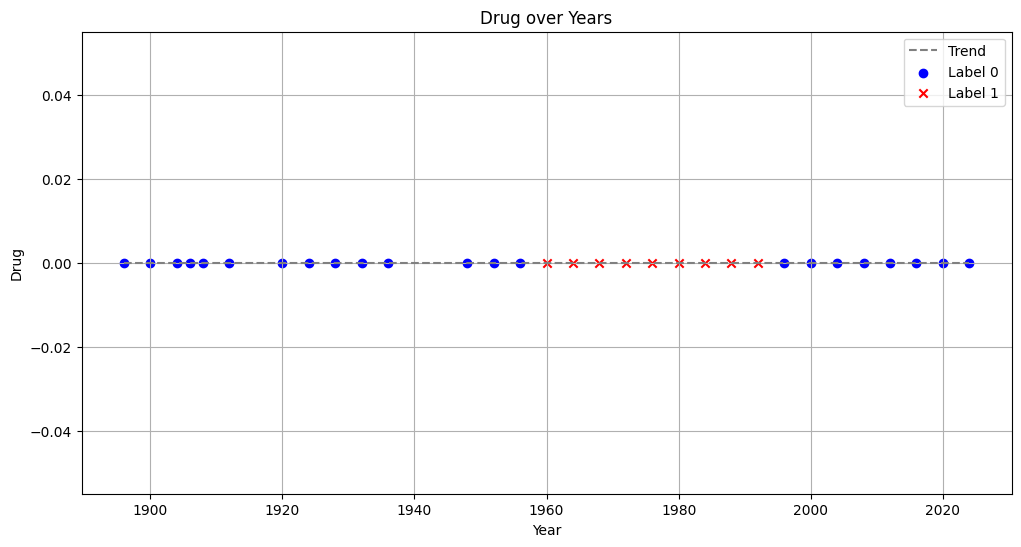

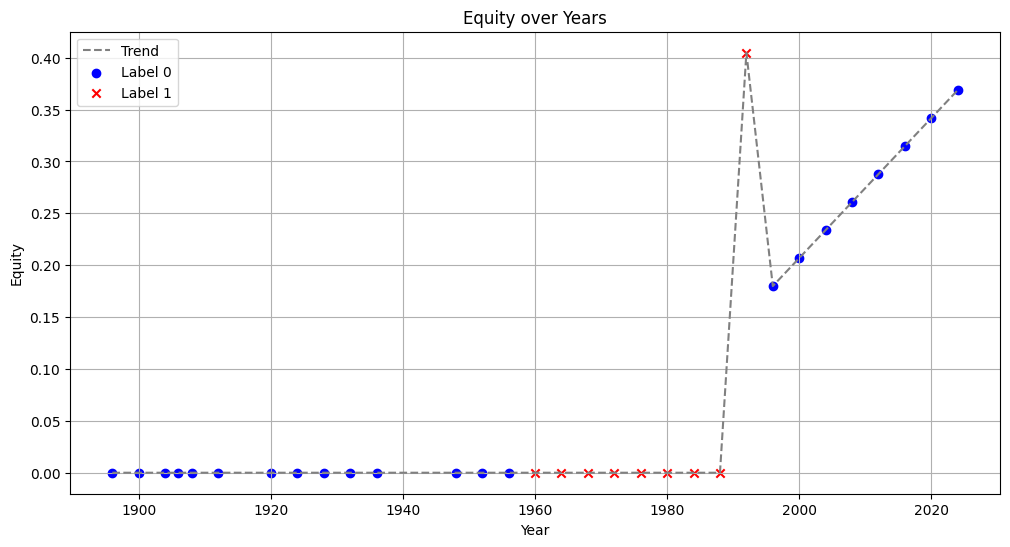

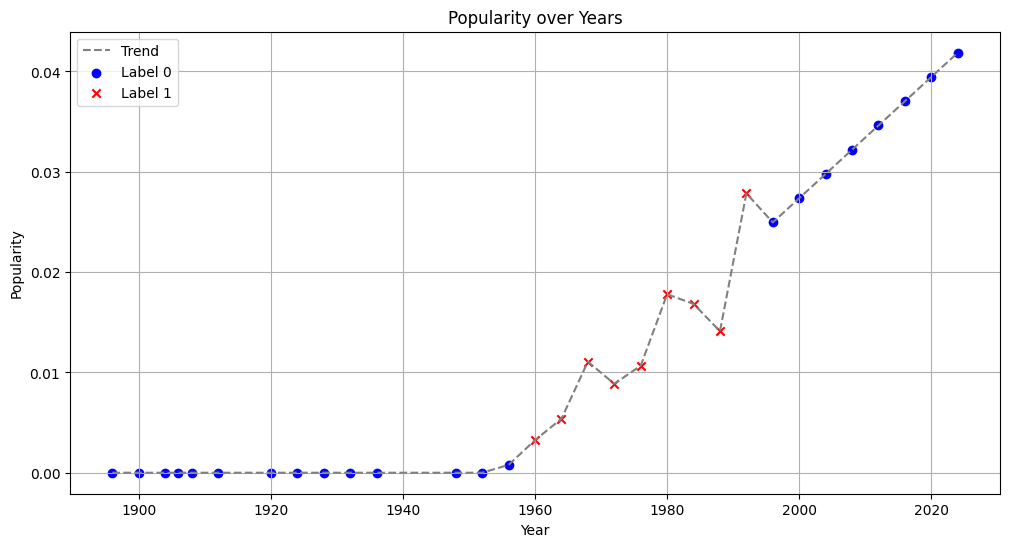

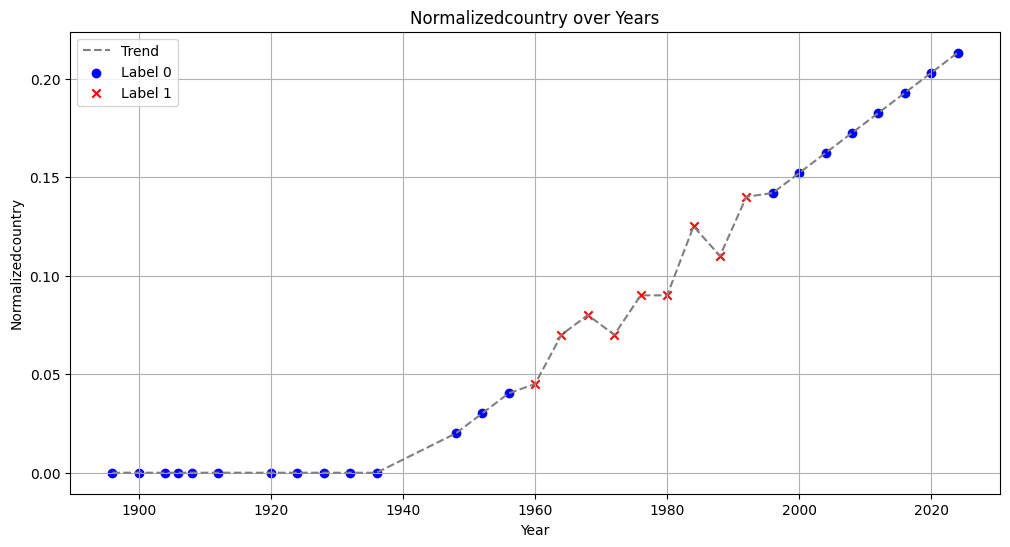

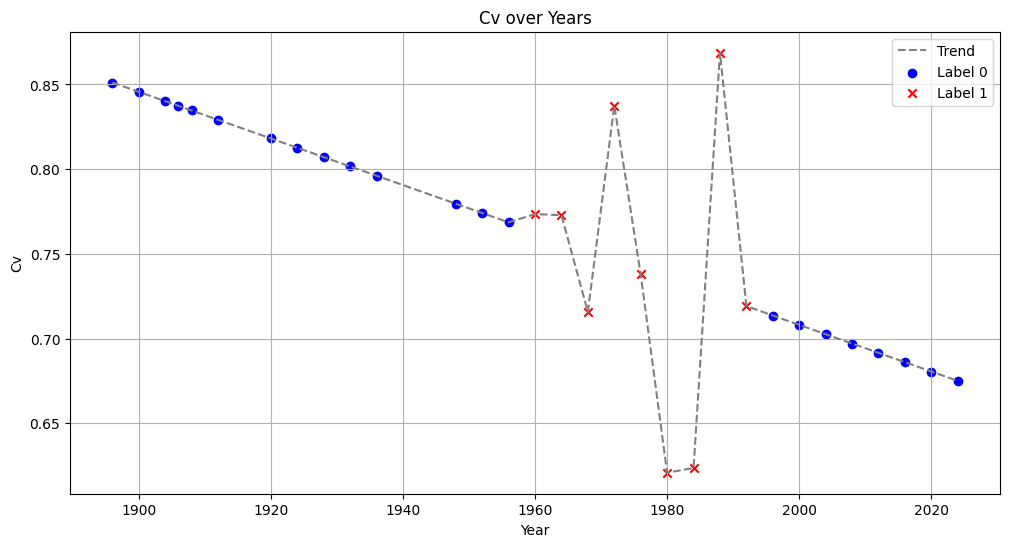

In [5]:
import matplotlib.pyplot as plt

def plot_data_with_labels(data):
    """
    Plot data with distinct colors for points where label is 1 or 0.

    Parameters:
    data (pd.DataFrame): DataFrame containing the columns: 'drug', 'equity', 'popularity', 
                         'normalizedcountry', 'CV', 'label' with 'Year' as the index.
    """
    # Filter data based on labels
    label_0 = data[data['label'] == 0]
    label_1 = data[data['label'] == 1]

    # Plot each parameter
    parameters = ['drug', 'equity', 'popularity', 'normalizedcountry', 'CV']
    for param in parameters:
        plt.figure(figsize=(12, 6))
        plt.plot(data.index, data[param], color='gray', label='Trend', linestyle='--')
        
        # Scatter plot for label 0
        plt.scatter(label_0.index, label_0[param], color='blue', label='Label 0', marker='o')
        
        # Scatter plot for label 1
        plt.scatter(label_1.index, label_1[param], color='red', label='Label 1', marker='x')
        
        # Add labels and title
        plt.title(f"{param.capitalize()} over Years")
        plt.xlabel("Year")
        plt.ylabel(param.capitalize())
        plt.legend()
        plt.grid(True)
        
        # Save or show the plot
        plt.show()

# Assuming data is in a pandas DataFrame named df
# plot_data_with_labels(df)
plot_data_with_labels(sport_data_dict['Biathlon'])

In [6]:
import pandas as pd

# Initialize an empty list to store each sport's data
all_sports_data = []

# Iterate over the sport_data_dict to process each sport's DataFrame
for sport, df in sport_data_dict.items():
    df = df.reset_index()  # Ensure 'Year' is a column, not an index
    df['Sport'] = sport  # Add a new column to indicate the sport name
    all_sports_data.append(df)  # Append the DataFrame to the list

# Concatenate all DataFrames in the list into a single DataFrame
combined_sport_data = pd.concat(all_sports_data, ignore_index=True)

# Display the first few rows of the combined DataFrame
combined_sport_data


,Year,drug,equity,popularity,normalizedcountry,CV,label,Sport
0,1896,0.0,0.316822,0.029387,0.023511,0.775016,0,Alpine Skiing
1,1900,0.0,0.318375,0.029939,0.031223,0.780618,0,Alpine Skiing
2,1904,0.0,0.319929,0.030490,0.038936,0.786221,0,Alpine Skiing
3,1906,0.0,0.320706,0.030766,0.042793,0.789022,0,Alpine Skiing
4,1908,0.0,0.321482,0.031042,0.046649,0.791823,0,Alpine Skiing
...,...,...,...,...,...,...,...,...
2010,2008,7.0,0.192420,0.025217,0.295000,0.722179,1,Wrestling
2011,2012,4.0,0.224189,0.026238,0.350000,0.767672,1,Wrestling
2012,2016,1.0,0.323699,0.025278,0.330000,0.709537,1,Wrestling
2013,2020,0.0,0.333333,0.027252,0.356916,0.663988,1,Wrestling


In [7]:
# Merge the DataFrames on the 'Sport' column
merged_df2 = combined_sport_data.merge(selected_columns, on='Sport', how='left').dropna()
merged_df = merged_df2
# Display the resulting DataFrame
merged_df2 = merged_df2.drop(columns=['Sport'])
merged_df

,Year,drug,equity,popularity,normalizedcountry,CV,label,Sport,sustain
0,1896,0.0,0.316822,0.029387,0.023511,0.775016,0,Alpine Skiing,7.601402
1,1900,0.0,0.318375,0.029939,0.031223,0.780618,0,Alpine Skiing,7.601402
2,1904,0.0,0.319929,0.030490,0.038936,0.786221,0,Alpine Skiing,7.601402
3,1906,0.0,0.320706,0.030766,0.042793,0.789022,0,Alpine Skiing,7.601402
4,1908,0.0,0.321482,0.031042,0.046649,0.791823,0,Alpine Skiing,7.601402
...,...,...,...,...,...,...,...,...,...
2010,2008,7.0,0.192420,0.025217,0.295000,0.722179,1,Wrestling,5.860786
2011,2012,4.0,0.224189,0.026238,0.350000,0.767672,1,Wrestling,5.860786
2012,2016,1.0,0.323699,0.025278,0.330000,0.709537,1,Wrestling,5.860786
2013,2020,0.0,0.333333,0.027252,0.356916,0.663988,1,Wrestling,5.860786


In [8]:
# Filter data for normal class
normal_class_data = merged_df[merged_df['label'] == 1].drop(columns=['label', 'Sport'])


In [9]:
merged_df = normal_class_data# Check basic information
print(merged_df.info())

# Display the first few rows
print(merged_df.head())

# Summary statistics
print(merged_df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 880 entries, 10 to 2014
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               880 non-null    int64  
 1   drug               880 non-null    float64
 2   equity             880 non-null    float64
 3   popularity         880 non-null    float64
 4   normalizedcountry  880 non-null    float64
 5   CV                 880 non-null    float64
 6   sustain            880 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 55.0 KB
None
    Year  drug    equity  popularity  normalizedcountry        CV   sustain
10  1936   0.0  0.359223    0.013919              0.130  0.870456  7.601402
11  1948   0.0  0.258333    0.048128              0.125  0.898061  7.601402
12  1952   0.0  0.335979    0.040393              0.140  0.818058  7.601402
13  1956   0.0  0.357320    0.062636              0.145  0.953060  7.601402
14  1960   0.0  0.403125    0.0

In [10]:
merged_df = normal_class_data

# EDA

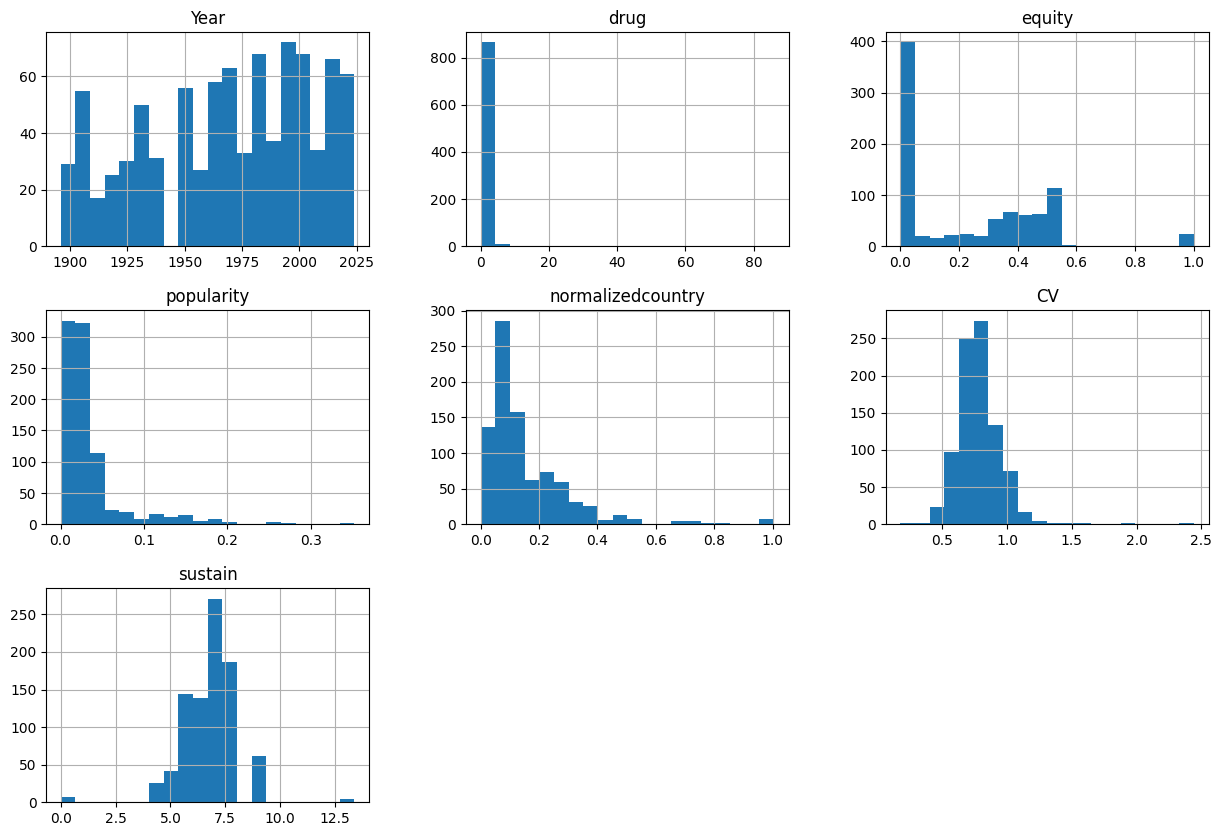

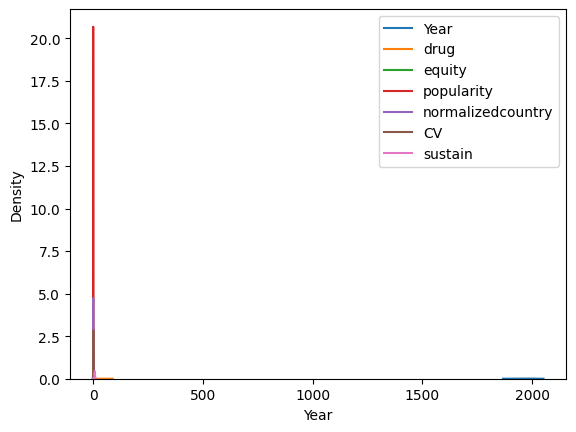

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
merged_df.hist(bins=20, figsize=(15, 10))
plt.show()

# KDE plots for each column
for column in merged_df.select_dtypes(include=['float64', 'int64']).columns:
    sns.kdeplot(merged_df[column], label=column)
plt.legend()
plt.show()


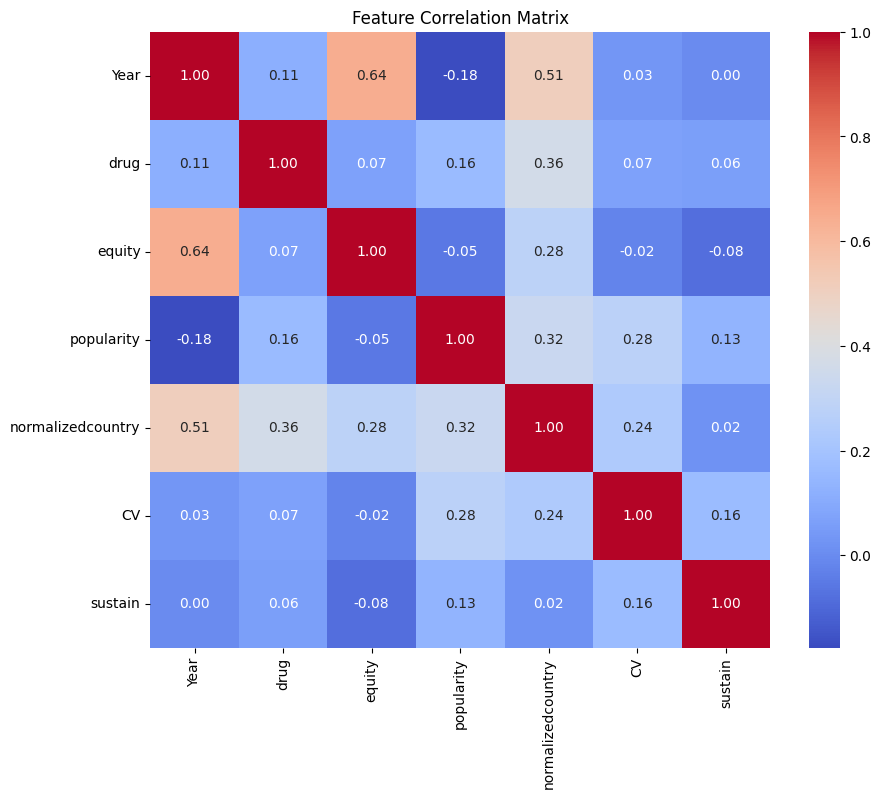

In [12]:
# Correlation matrix
corr_matrix = merged_df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()


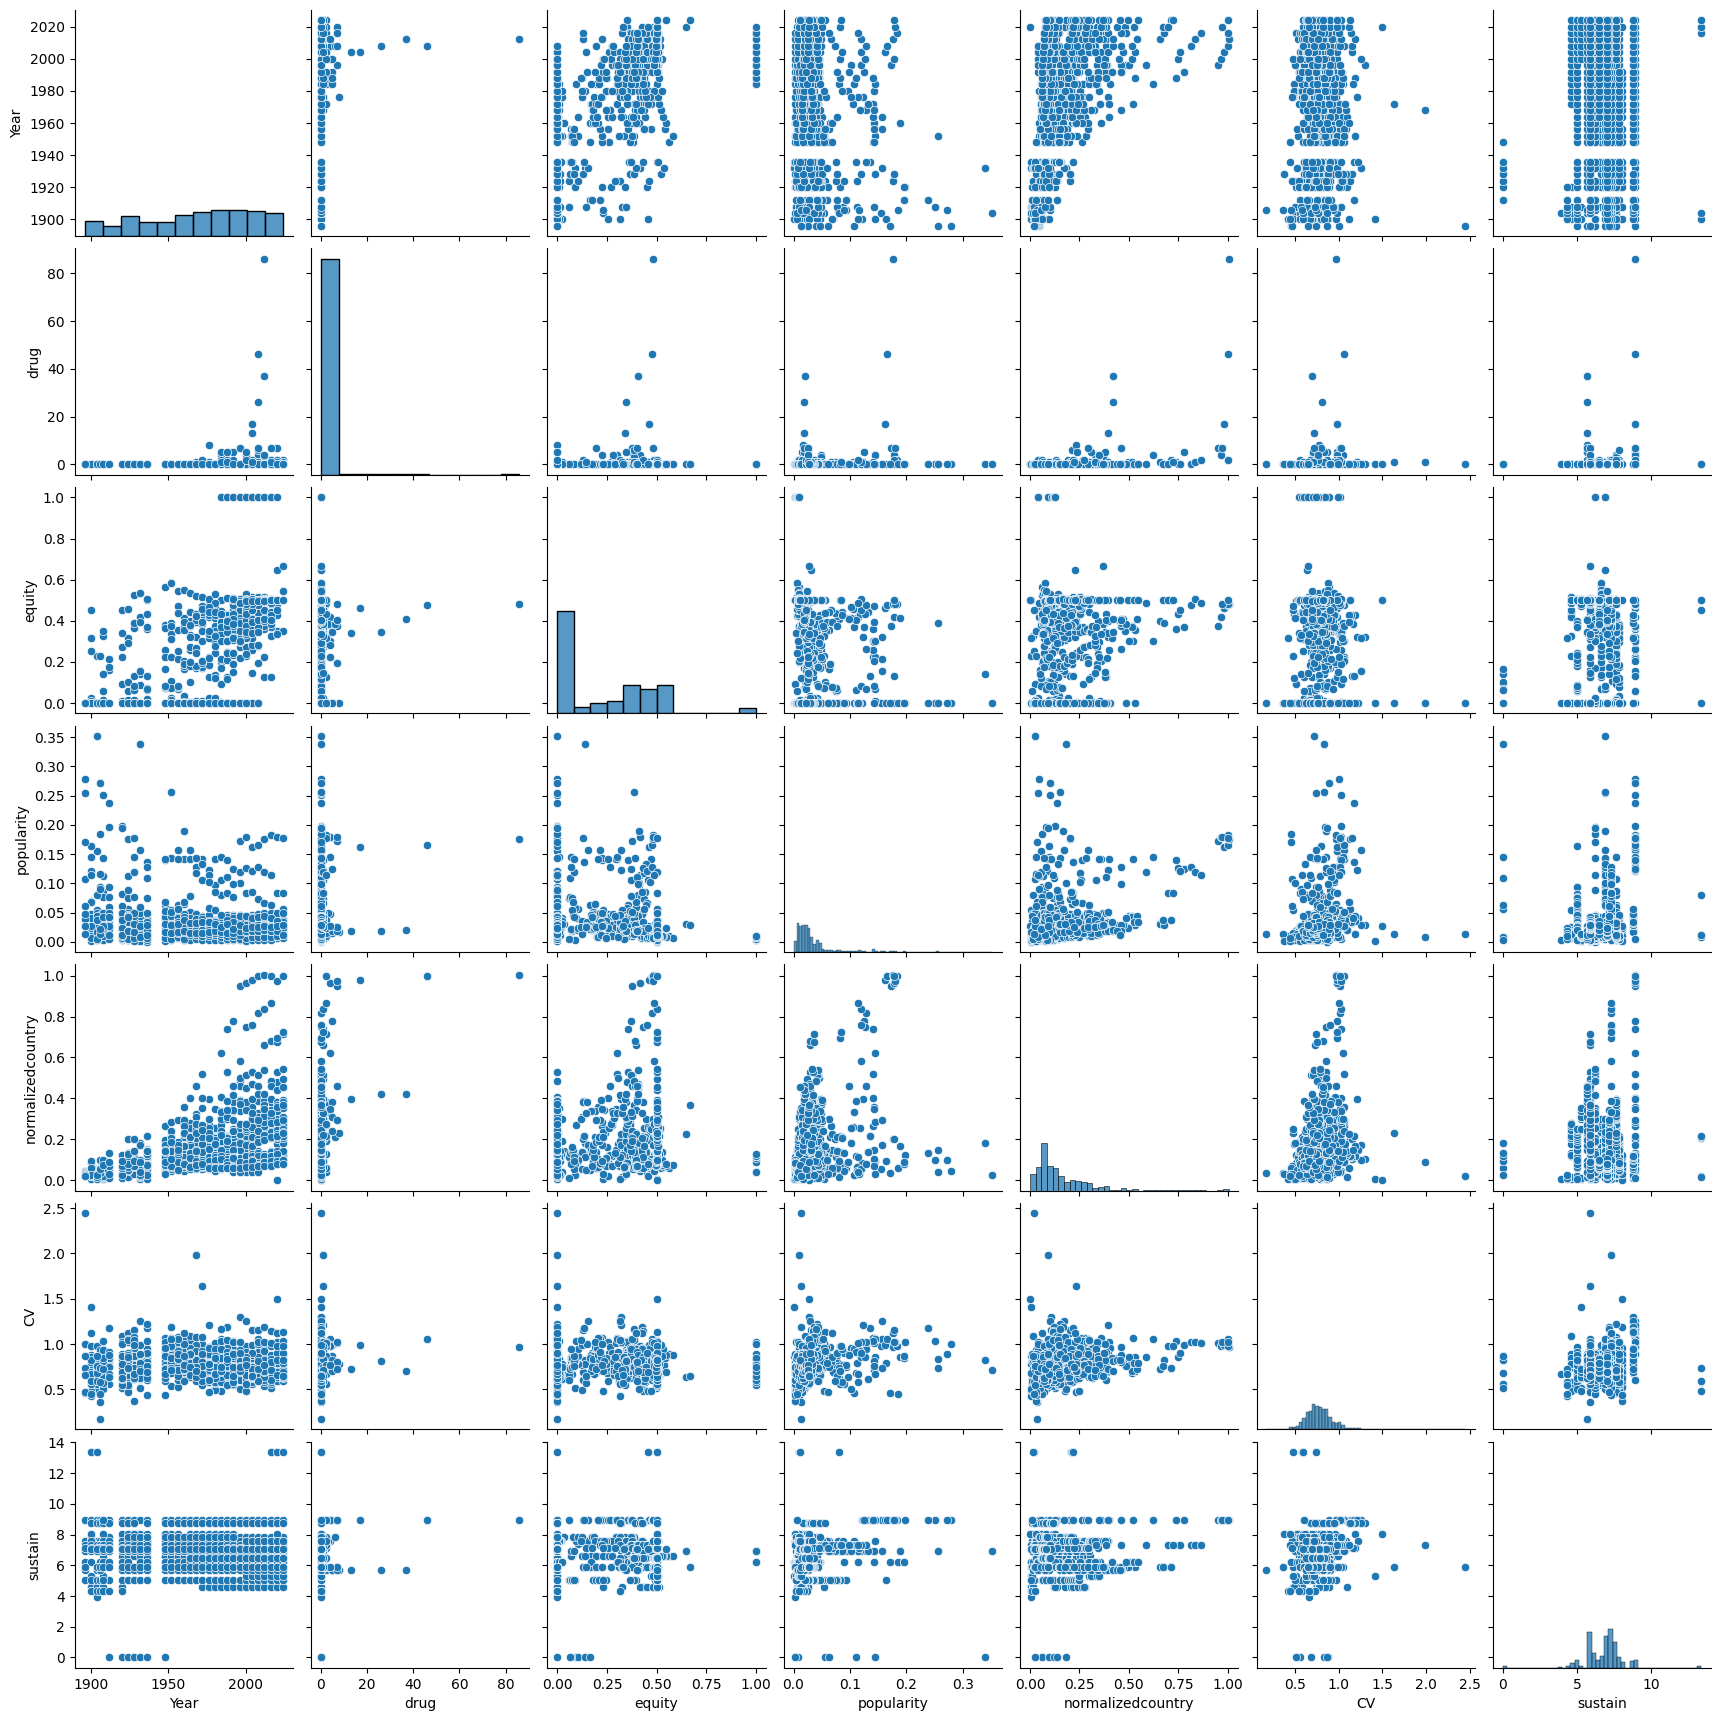

In [13]:
sns.pairplot(merged_df.select_dtypes(include=['float64', 'int64']))
plt.show()


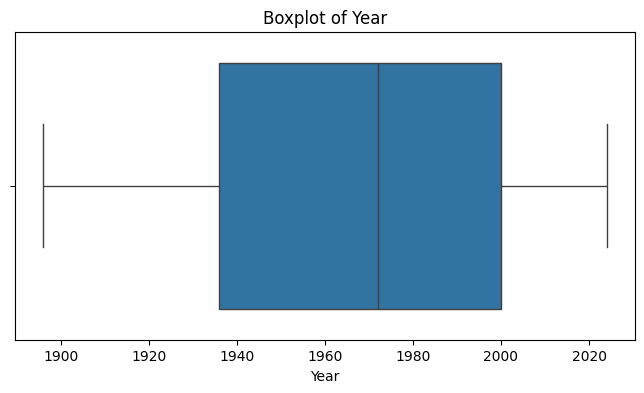

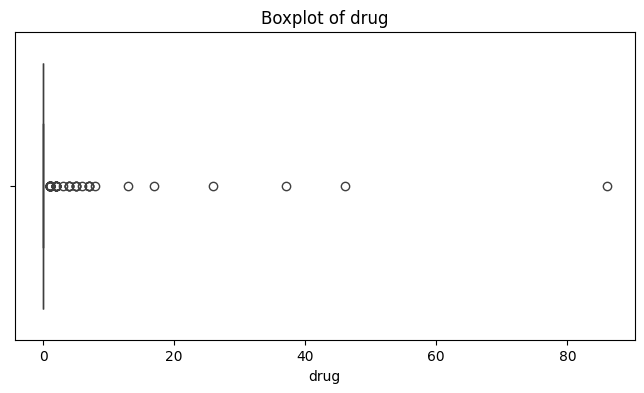

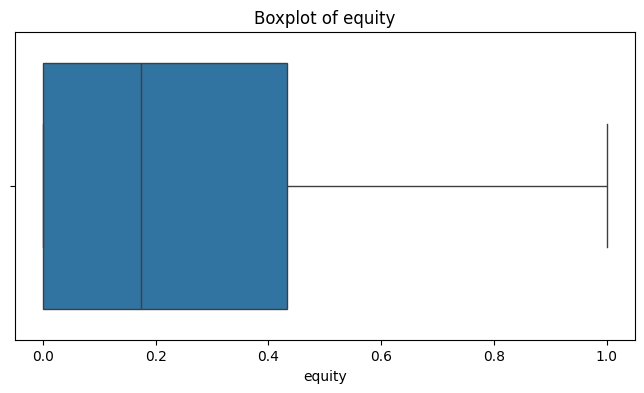

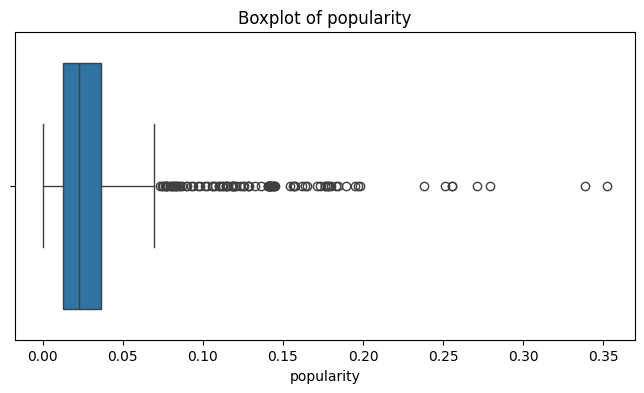

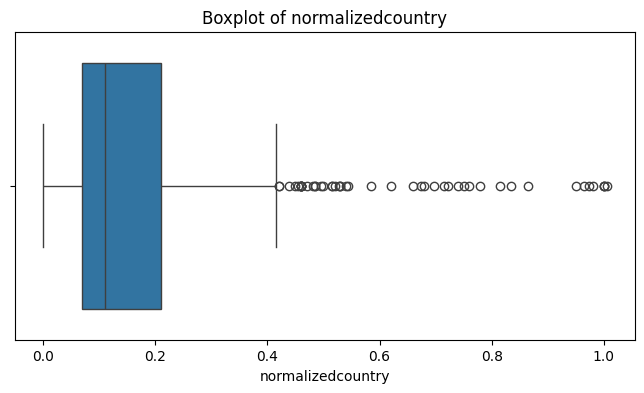

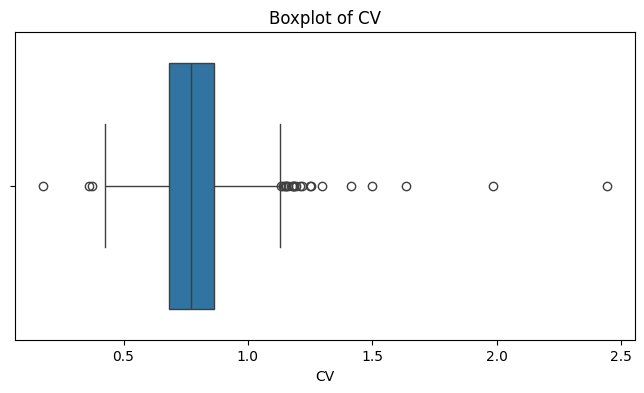

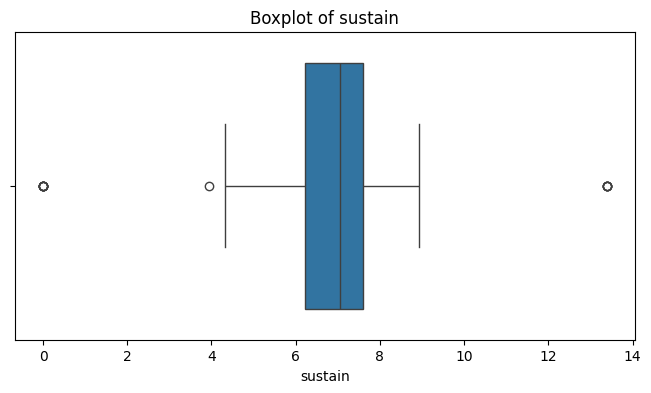

In [14]:
# Boxplot for each numeric feature
for column in merged_df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=merged_df, x=column)
    plt.title(f'Boxplot of {column}')
    plt.show()


In [15]:
merged_df2.describe()

,Year,drug,equity,popularity,normalizedcountry,CV,label,sustain
count,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000
mean,1960.620690,0.227833,0.227039,0.027579,0.115634,0.776394,0.541872,6.811030
std,39.524206,2.774288,0.231672,0.046114,0.131436,0.234089,0.498397,1.612889
min,1896.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1924.000000,0.000000,0.000000,0.006816,0.035707,0.657281,0.000000,6.216606
50%,1964.000000,0.000000,0.207207,0.016127,0.080000,0.759141,1.000000,6.908755
75%,1996.000000,0.000000,0.450462,0.028389,0.145000,0.868697,1.000000,7.601402
max,2024.000000,86.000000,1.000000,0.400000,1.005000,2.442317,1.000000,13.384729


In [16]:
merged_df2

,Year,drug,equity,popularity,normalizedcountry,CV,label,sustain
0,1896,0.0,0.316822,0.029387,0.023511,0.775016,0,7.601402
1,1900,0.0,0.318375,0.029939,0.031223,0.780618,0,7.601402
2,1904,0.0,0.319929,0.030490,0.038936,0.786221,0,7.601402
3,1906,0.0,0.320706,0.030766,0.042793,0.789022,0,7.601402
4,1908,0.0,0.321482,0.031042,0.046649,0.791823,0,7.601402
...,...,...,...,...,...,...,...,...
2010,2008,7.0,0.192420,0.025217,0.295000,0.722179,1,5.860786
2011,2012,4.0,0.224189,0.026238,0.350000,0.767672,1,5.860786
2012,2016,1.0,0.323699,0.025278,0.330000,0.709537,1,5.860786
2013,2020,0.0,0.333333,0.027252,0.356916,0.663988,1,5.860786


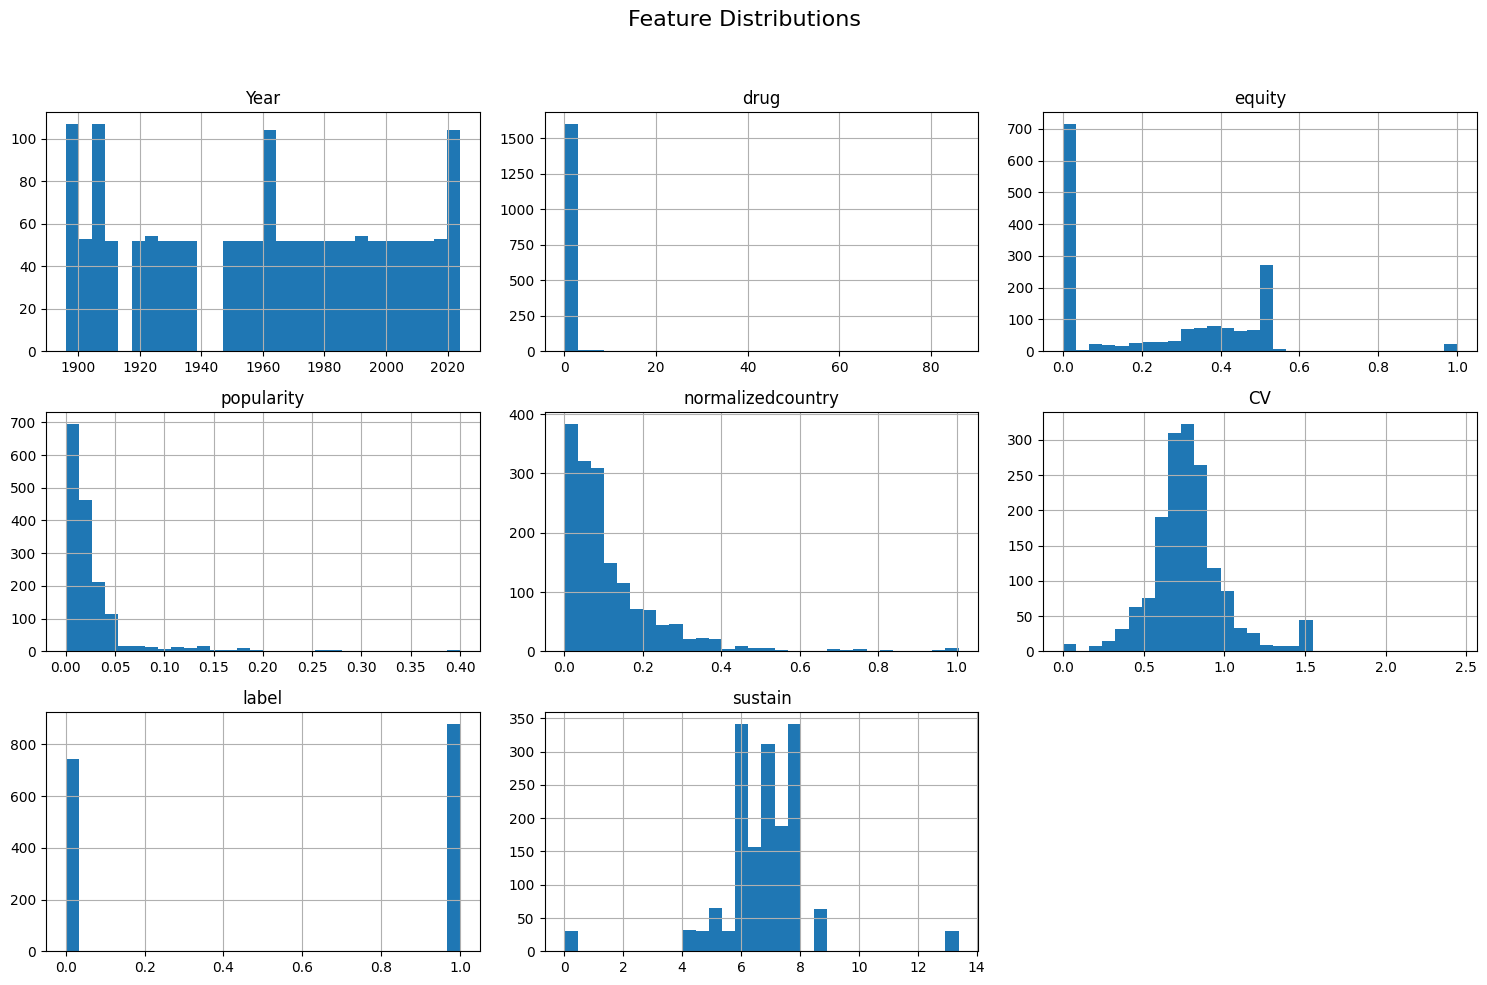

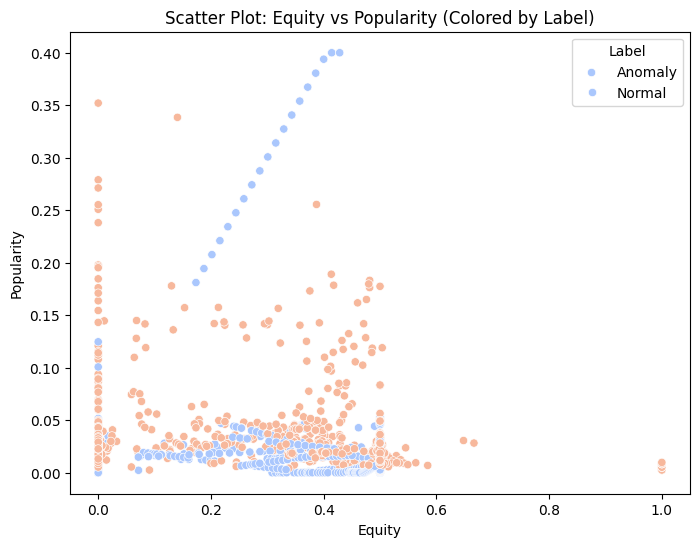

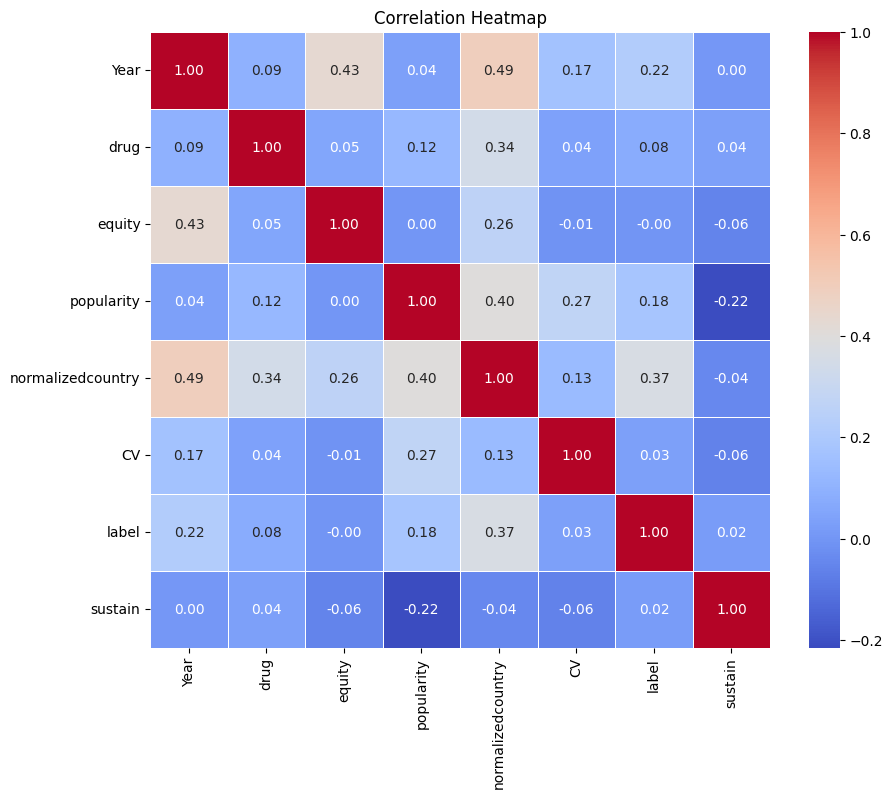

/tmp/ipykernel_14791/1188648840.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x='label', palette='coolwarm')


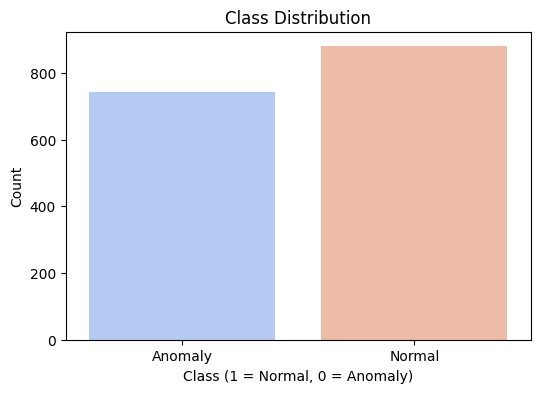

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load merged_df2
df2 = merged_df2.copy()

# 1. Feature distribution (Histogram)
df2.hist(bins=30, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 2. Scatter plot of two features
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2, x='equity', y='popularity', hue='label', palette='coolwarm')
plt.title("Scatter Plot: Equity vs Popularity (Colored by Label)")
plt.xlabel("Equity")
plt.ylabel("Popularity")
plt.legend(title="Label", labels=["Anomaly", "Normal"])
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# 4. Class Distribution Bar Plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df2, x='label', palette='coolwarm')
plt.title("Class Distribution")
plt.xlabel("Class (1 = Normal, 0 = Anomaly)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Anomaly", "Normal"])
plt.show()


# Model training

Scaler saved at 'saved_models/scaler.pkl'
Model 'RandomForest' saved at 'saved_models/RandomForest_best_model.pkl'
Best Params for RandomForest: {'max_depth': 20, 'n_estimators': 150, 'random_state': 42}
Classification Report for RandomForest:

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       149
           1       0.91      0.93      0.92       176

    accuracy                           0.91       325
   macro avg       0.91      0.91      0.91       325
weighted avg       0.91      0.91      0.91       325



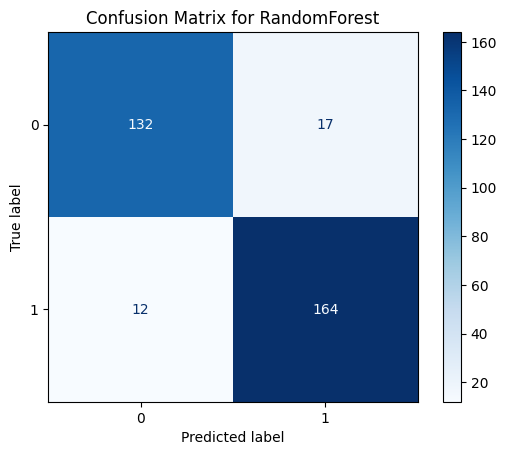

Model 'LogisticRegression' saved at 'saved_models/LogisticRegression_best_model.pkl'
Best Params for LogisticRegression: {'C': 10.0, 'max_iter': 100, 'solver': 'lbfgs'}
Classification Report for LogisticRegression:

              precision    recall  f1-score   support

           0       0.69      0.66      0.68       149
           1       0.72      0.74      0.73       176

    accuracy                           0.71       325
   macro avg       0.71      0.70      0.70       325
weighted avg       0.71      0.71      0.71       325



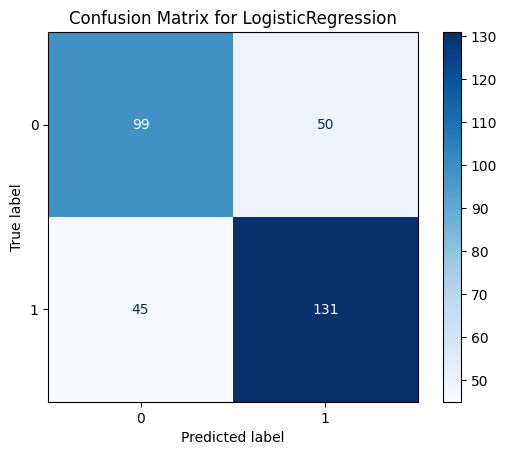

Model 'SVC' saved at 'saved_models/SVC_best_model.pkl'
Best Params for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Classification Report for SVC:

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       149
           1       0.87      0.90      0.88       176

    accuracy                           0.87       325
   macro avg       0.87      0.87      0.87       325
weighted avg       0.87      0.87      0.87       325



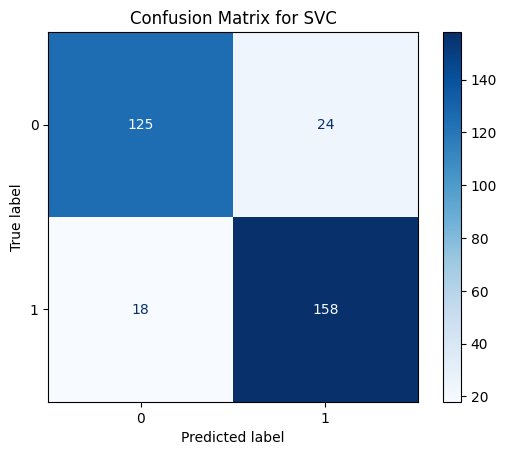

Model 'KNN' saved at 'saved_models/KNN_best_model.pkl'
Best Params for KNN: {'n_neighbors': 3, 'weights': 'distance'}
Classification Report for KNN:

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       149
           1       0.94      0.84      0.89       176

    accuracy                           0.88       325
   macro avg       0.89      0.89      0.88       325
weighted avg       0.89      0.88      0.88       325



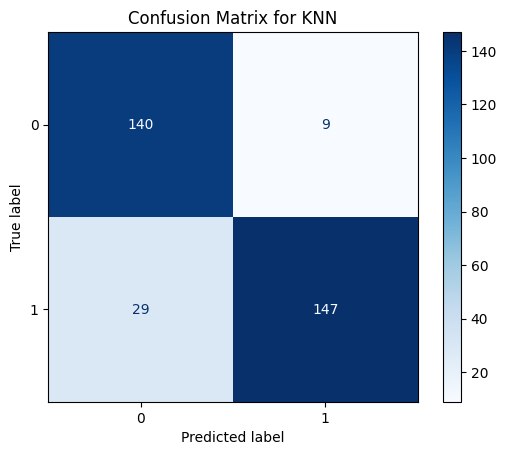

Model 'GradientBoosting' saved at 'saved_models/GradientBoosting_best_model.pkl'
Best Params for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 42}
Classification Report for GradientBoosting:

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       149
           1       0.90      0.94      0.92       176

    accuracy                           0.91       325
   macro avg       0.91      0.91      0.91       325
weighted avg       0.91      0.91      0.91       325



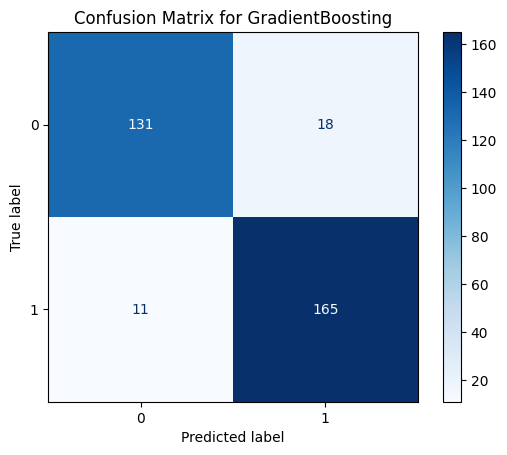

Model 'BaggingClassifier' saved at 'saved_models/BaggingClassifier_best_model.pkl'
Best Params for BaggingClassifier: {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 50, 'random_state': 42}
Classification Report for BaggingClassifier:

              precision    recall  f1-score   support

           0       0.92      0.85      0.89       149
           1       0.88      0.94      0.91       176

    accuracy                           0.90       325
   macro avg       0.90      0.89      0.90       325
weighted avg       0.90      0.90      0.90       325



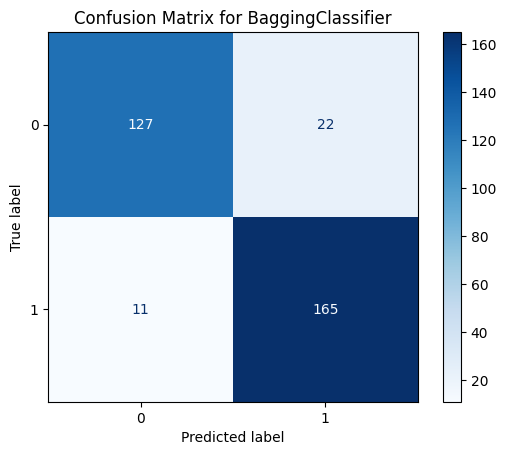

/media/tameszaza/My Passport/ml/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/media/tameszaza/My Passport/ml/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/media/tameszaza/My Passport/ml/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/media/tameszaza/My Passport/ml/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be r

Model 'AdaBoostClassifier' saved at 'saved_models/AdaBoostClassifier_best_model.pkl'
Best Params for AdaBoostClassifier: {'learning_rate': 1.0, 'n_estimators': 100, 'random_state': 42}
Classification Report for AdaBoostClassifier:

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       149
           1       0.82      0.88      0.85       176

    accuracy                           0.83       325
   macro avg       0.83      0.83      0.83       325
weighted avg       0.83      0.83      0.83       325



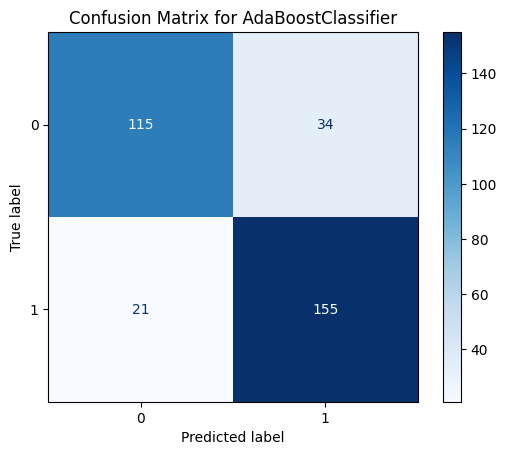

/media/tameszaza/My Passport/ml/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:29:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/media/tameszaza/My Passport/ml/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:29:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/media/tameszaza/My Passport/ml/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:29:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/media/tameszaza/My Passport/ml/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:29:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/media/tameszaza/My Passport/ml/.venv/lib/py

Model 'XGBoostClassifier' saved at 'saved_models/XGBoostClassifier_best_model.pkl'
Best Params for XGBoostClassifier: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100, 'random_state': 42}
Classification Report for XGBoostClassifier:

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       149
           1       0.91      0.91      0.91       176

    accuracy                           0.90       325
   macro avg       0.90      0.90      0.90       325
weighted avg       0.90      0.90      0.90       325



/media/tameszaza/My Passport/ml/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:29:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


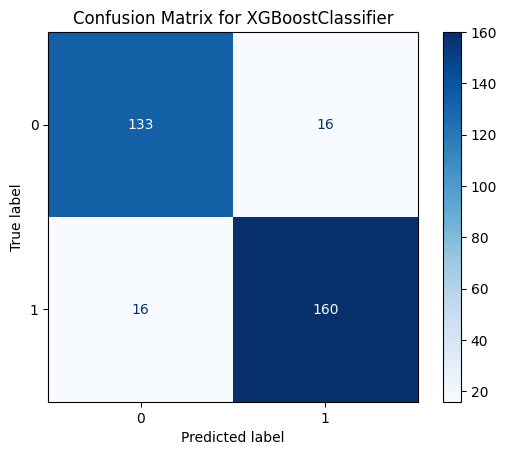

[LightGBM] [Info] Number of positive: 352, number of negative: 297
[LightGBM] [Info] Number of positive: 352, number of negative: 298
[LightGBM] [Info] Number of positive: 352, number of negative: 297
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Number of positive: 352, number of negative: 297
[LightGBM] [Info] Total Bins 702
[LightGBM] [Info] Total Bins 693
[LightGBM] [Info] Number of data points in the train set: 650, number of used features: 7
[LightGBM] [Info] Number of data points in the train set: 649, number of used features: 7
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_col_wise=true` to remove the overhead.


/media/tameszaza/My Passport/ml/.venv/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Model 'LGBMClassifier' saved at 'saved_models/LGBMClassifier_best_model.pkl'
Best Params for LGBMClassifier: {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 150, 'random_state': 42}
Classification Report for LGBMClassifier:

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       149
           1       0.90      0.94      0.92       176

    accuracy                           0.91       325
   macro avg       0.92      0.91      0.91       325
weighted avg       0.91      0.91      0.91       325



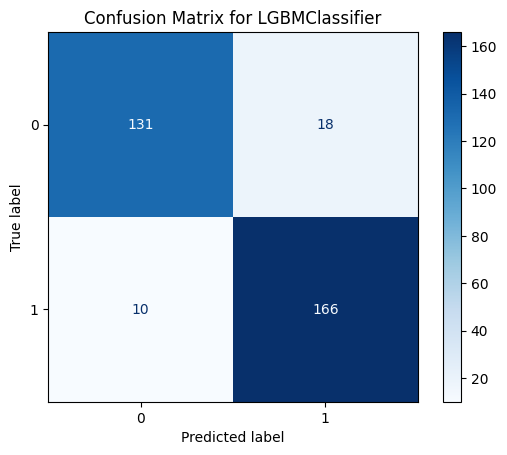

Model 'ExtraTreesClassifier' saved at 'saved_models/ExtraTreesClassifier_best_model.pkl'
Best Params for ExtraTreesClassifier: {'max_depth': None, 'n_estimators': 150, 'random_state': 42}
Classification Report for ExtraTreesClassifier:

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       149
           1       0.92      0.93      0.93       176

    accuracy                           0.92       325
   macro avg       0.92      0.92      0.92       325
weighted avg       0.92      0.92      0.92       325



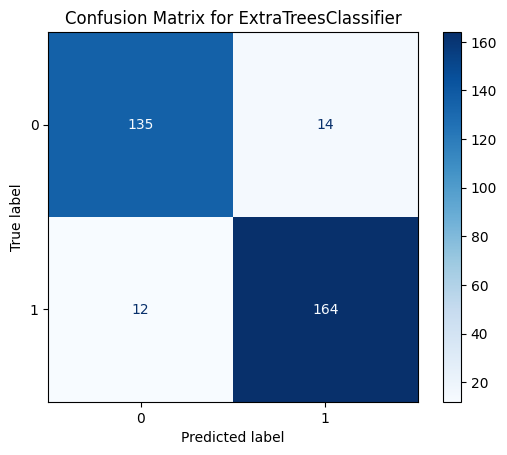

Model 'CatBoostClassifier' saved at 'saved_models/CatBoostClassifier_best_model.pkl'
Best Params for CatBoostClassifier: {'depth': 6, 'iterations': 200, 'learning_rate': 0.3, 'random_seed': 42}
Classification Report for CatBoostClassifier:

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       149
           1       0.92      0.95      0.94       176

    accuracy                           0.93       325
   macro avg       0.93      0.93      0.93       325
weighted avg       0.93      0.93      0.93       325



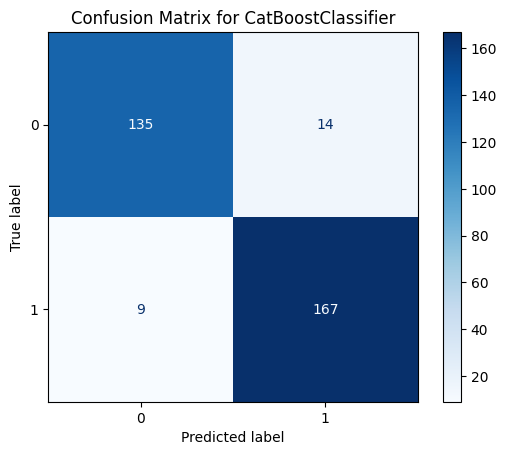

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import joblib  # For saving models and scalers
import os  # For creating directories

# Ensure the output directory exists
os.makedirs("saved_models", exist_ok=True)

# Load and prepare data
X = df2.drop(columns=['label'])
y = df2['label']

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Preprocessing: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Save the scaler
joblib.dump(scaler, "saved_models/scaler.pkl")
print("Scaler saved at 'saved_models/scaler.pkl'")

# Results storage
results = {}

# Function for evaluating and saving classification models
def evaluate_classification_model(model, param_grid, model_name, X_train, y_train, X_val, y_val):
    grid_search = GridSearchCV(model, param_grid, scoring='f1_macro', cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # Save the trained model
    model_path = f"saved_models/{model_name}_best_model.pkl"
    joblib.dump(best_model, model_path)
    print(f"Model '{model_name}' saved at '{model_path}'")

    # Predict on validation set
    preds = best_model.predict(X_val)

    # Store results
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'classification_report': classification_report(y_val, preds, output_dict=True),
        'confusion_matrix': confusion_matrix(y_val, preds)
    }

    print(f"Best Params for {model_name}: {results[model_name]['best_params']}")
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_val, preds))

    # Dynamic Confusion Matrix Plot
    cm = results[model_name]['confusion_matrix']
    labels = np.unique([0, 1])
    disp = ConfusionMatrixDisplay(cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Define models and parameters

models_and_params = {
    "RandomForest": (RandomForestClassifier(), {
        'n_estimators': [50, 100, 150],
        'max_depth': [10, 20, None],
        'random_state': [42]
    }),
    "LogisticRegression": (LogisticRegression(), {
        'C': [0.1, 1.0, 10.0],
        'solver': ['lbfgs', 'liblinear'],
        'max_iter': [100, 200]
    }),
    "SVC": (SVC(), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    "KNN": (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 10],
        'weights': ['uniform', 'distance']
    }),
    "GradientBoosting": (GradientBoostingClassifier(), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 10],
        'random_state': [42]
    }),
    "BaggingClassifier": (BaggingClassifier(), {
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 1.0],
        'max_features': [0.5, 1.0],
        'random_state': [42]
    }),
    "AdaBoostClassifier": (AdaBoostClassifier(), {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1.0],
        'random_state': [42]
    }),
    "XGBoostClassifier": (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 10],
        'random_state': [42]
    }),
    "LGBMClassifier": (LGBMClassifier(), {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [-1, 10, 20],
        'random_state': [42]
    }),
    "ExtraTreesClassifier": (ExtraTreesClassifier(), {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'random_state': [42]
    }),
    "CatBoostClassifier": (CatBoostClassifier(verbose=0), {
        'iterations': [100, 200],
        'learning_rate': [0.01, 0.1, 0.3],
        'depth': [6, 8, 10],
        'random_seed': [42]
    }),
}

# Run all models
for model_name, (model, param_grid) in models_and_params.items():
    evaluate_classification_model(model, param_grid, model_name, X_train_scaled, y_train, X_val_scaled, y_val)


In [19]:
X_val

,Year,drug,equity,popularity,normalizedcountry,CV,sustain
1359,2008,0.0,0.430780,0.023617,0.000000,1.500000,8.006701
1515,2012,0.0,0.000000,0.002682,0.030000,0.660554,8.006701
170,1964,0.0,0.500000,0.015945,0.057143,0.615454,6.621406
590,1900,0.0,0.160692,0.012761,0.035900,0.677649,5.860786
1679,1912,0.0,0.500000,0.000000,0.013333,0.278749,6.216606
...,...,...,...,...,...,...,...
1110,2004,0.0,0.500000,0.004761,0.130000,0.684172,7.313887
1707,1904,0.0,0.313537,0.013533,0.010833,1.175981,5.860786
1151,1908,0.0,0.000000,0.007457,0.060792,0.758078,7.601402
1790,1996,0.0,0.487805,0.017852,0.275000,0.809754,7.131699


# How To make predictions

In [20]:
from sklearn.preprocessing import StandardScaler
import joblib
import numpy as np

# Load the scaler
scaler = joblib.load('saved_models/scaler.pkl')

# Load a saved model (e.g., RandomForest)
model = joblib.load('saved_models/CatBoostClassifier_best_model.pkl')

# Check if the model supports probabilistic predictions
if hasattr(model, 'predict_proba'):
    # Example: Predict probabilistically using the loaded model
    scaled_input = scaler.transform(X_test)  # Scale new input data
    probabilities = model.predict_proba(scaled_input)
    
    # Print class probabilities
    print("Predicted Probabilities:\n", probabilities)
    
    # Optionally, get the predicted class with the highest probability
    predicted_classes = np.argmax(probabilities, axis=1)
    print("Predicted Classes:\n", predicted_classes)
else:
    print(f"The model '{type(model).__name__}' does not support probabilistic predictions.")


Predicted Probabilities:
 [[9.98377006e-01 1.62299387e-03]
 [7.92045647e-03 9.92079544e-01]
 [4.58137507e-03 9.95418625e-01]
 [8.53759062e-01 1.46240938e-01]
 [1.98845936e-03 9.98011541e-01]
 [9.98617681e-01 1.38231900e-03]
 [2.79448232e-02 9.72055177e-01]
 [9.99507949e-01 4.92051315e-04]
 [9.88938376e-01 1.10616244e-02]
 [8.54947477e-03 9.91450525e-01]
 [1.02346844e-02 9.89765316e-01]
 [3.27140555e-01 6.72859445e-01]
 [9.99662106e-01 3.37893988e-04]
 [9.29213745e-01 7.07862549e-02]
 [3.26015740e-01 6.73984260e-01]
 [1.09139839e-02 9.89086016e-01]
 [5.70695089e-03 9.94293049e-01]
 [9.21631786e-01 7.83682145e-02]
 [1.86887403e-02 9.81311260e-01]
 [9.98344086e-01 1.65591387e-03]
 [9.60967946e-01 3.90320539e-02]
 [4.28324789e-03 9.95716752e-01]
 [3.92827038e-03 9.96071730e-01]
 [1.45104306e-03 9.98548957e-01]
 [9.97724493e-01 2.27550716e-03]
 [9.97127027e-01 2.87297290e-03]
 [9.96119997e-01 3.88000327e-03]
 [3.36827805e-03 9.96631722e-01]
 [1.35224610e-03 9.98647754e-01]
 [9.98197715e-01 

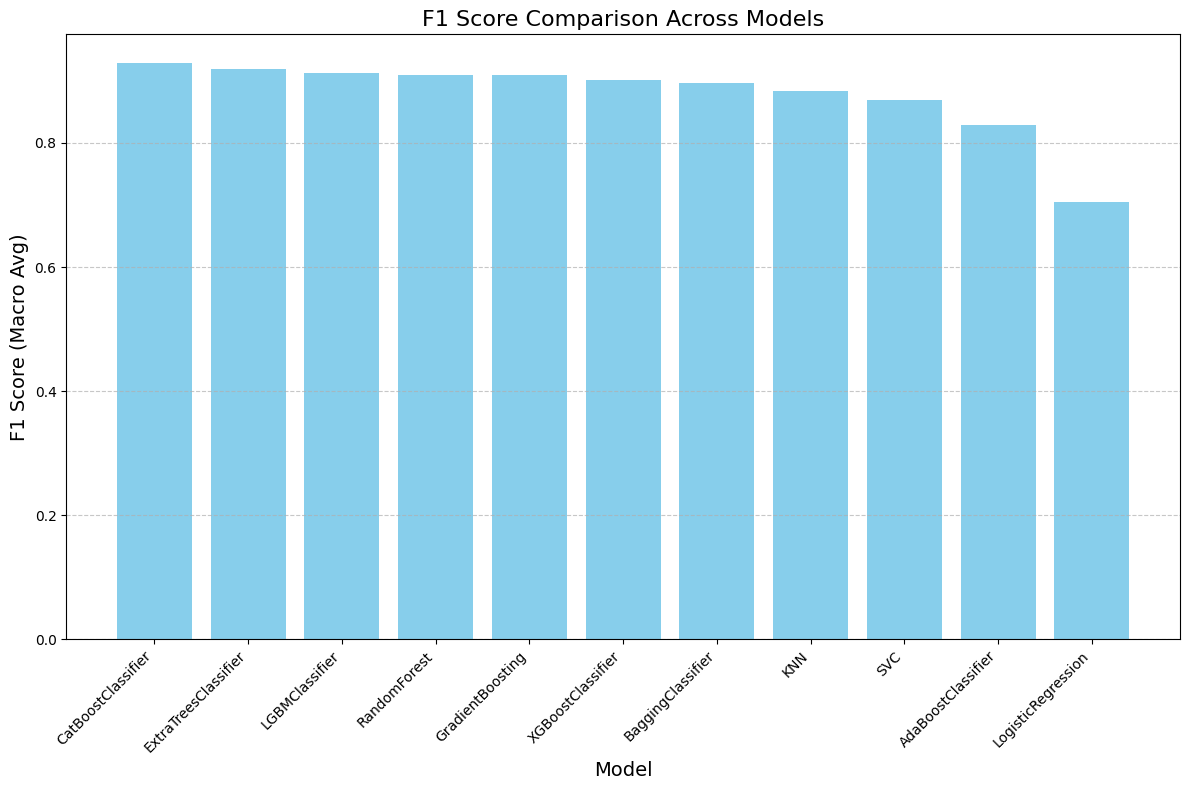

In [21]:
# Extract F1 scores from results and plot
f1_scores = {model_name: results[model_name]['classification_report']['macro avg']['f1-score'] for model_name in results}

# Sort the models by F1 scores for better visualization
sorted_f1_scores = dict(sorted(f1_scores.items(), key=lambda item: item[1], reverse=True))

# Plotting the F1 scores
plt.figure(figsize=(12, 8))
plt.bar(sorted_f1_scores.keys(), sorted_f1_scores.values(), color='skyblue')
plt.xlabel('Model', fontsize=14)
plt.ylabel('F1 Score (Macro Avg)', fontsize=14)
plt.title('F1 Score Comparison Across Models', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
